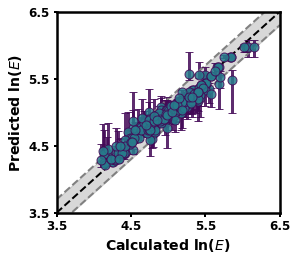

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '2_10colKfold_prediresults.csv'
data = pd.read_csv(file_path, index_col='index')

true_values = data['True_Values']
predictions = data.loc[:, 'Fold1_Predictions':'Fold10_Predictions']

mean_values = predictions.mean(axis=1)
max_values = predictions.max(axis=1)
min_values = predictions.min(axis=1)

error_upper = max_values - mean_values
error_lower = mean_values - min_values

plt.figure(figsize=(4, 3.7))

plt.fill_betweenx(
    y=np.linspace(3.5, 6.5, 100),  
    x1=np.linspace(3.5, 6.5, 100) - 0.2,
    x2=np.linspace(3.5, 6.5, 100) + 0.2, 
    color='gray', alpha=0.3, label='Error ±20' 
)

plt.plot([3.5, 6.5], [3.5, 6.5], '--', color='black', linewidth=2)
plt.plot([3.5, 6.5], [3.5 + 0.2, 6.5 + 0.2], '--', color='gray', linewidth=2)
plt.plot([3.5, 6.5], [3.5 - 0.2, 6.5 - 0.2], '--', color='gray', linewidth=2)
plt.xlabel(r'Calculated ln($E$)', fontsize=14, fontweight='bold')
plt.ylabel(r'Predicted ln($E$)', fontsize=14, fontweight='bold')
plt.xlim(3.5, 6.5)  
plt.ylim(3.5, 6.5)

plt.errorbar(
    true_values, 
    mean_values, 
    yerr=[error_lower, error_upper], 
    fmt='o',            
    label='Mean Predictions with Error Bars', 
    color='#420856', 
    markerfacecolor='#277C8C',
    alpha=0.85,
    markersize=9,
    capsize=4,
    linewidth=3
)

plt.gca().spines['top'].set_linewidth(2.5)
plt.gca().spines['right'].set_linewidth(2.5)
plt.gca().spines['bottom'].set_linewidth(2.5)
plt.gca().spines['left'].set_linewidth(2.5)
plt.tick_params(axis='both', which='major', width=2) 
plt.xticks(ticks=[3.5, 4.5,  5.5, 6.5], fontsize=12, fontweight='bold')
plt.yticks(ticks=[3.5, 4.5,  5.5, 6.5], fontsize=12, fontweight='bold')
plt.savefig('RF.jpg', dpi=1000, bbox_inches='tight', pad_inches=0.1)
plt.show()